In [231]:
import pandas as pd
import numpy as np
monte  = pd.Series(['sky', 'blud', 'earth', 'happy'])

# Pandas Series의 str 함수.
# Series Type을 string Type으로 변환시킨다.
monte.str.upper()
monte.str.lower()
monte.str.len()
monte.str.startswith('T')
monte.str.split()

0      [sky]
1     [blud]
2    [earth]
3    [happy]
dtype: object

In [140]:
df = pd.read_csv('./sales.csv')
print(df.dtypes)

df['2016'] = df['2016'].str.replace('$', '')
df['2016'] = df['2016'].str.replace(',', '').astype(float)

df['2017'] = df['2017'].str.replace('$', '')
df['2017'] = df['2017'].str.replace(',', '').astype(float)

df['Percent Growth'] = df['Percent Growth'].str.replace('%','').astype(float)
df['Percent Growth'] = df['Percent Growth']/100

df['Jan Units'] = df['Jan Units'].str.replace('Closed', '0').astype(float)

df['Active'] = df['Active'].str.replace('Y', 'True')
df['Active'] = df['Active'].str.replace('N', 'False')

# df['Customer Name'] = df['Customer Name']

Customer Number    float64
Customer Name       object
2016                object
2017                object
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object


In [129]:
print(df.dtypes)
df

Customer Number    float64
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object


,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True
1,552278.0,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True
2,23477.0,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True
3,24900.0,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True
4,651029.0,Harbor Co,15000.0,12750.0,-0.15,0.0,2,2,2014,False


In [229]:
# pd.read_csv('./dataset.csv', skipinitialspace = True) null값이 있는 행을 모두 제거.
df = pd.read_csv('./dataset.csv')
print(df.info(), '\n')

df.columns = df.columns.str.strip()
print(df.columns)

df['age'] = pd.to_numeric(df['age'].astype(str).str.strip(), errors = 'ignore')
df['age'].dropna().sum()

df['price'] = pd.to_numeric(df['price'].astype(str).str.strip(), errors = 'ignore')
df['price'].dropna().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resident  300 non-null    object
 1   gender    300 non-null    int64 
 2   job       300 non-null    object
 3   age       300 non-null    object
 4   position  300 non-null    object
 5   price     300 non-null    object
 6   survey    300 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 16.5+ KB
None 

Index(['resident', 'gender', 'job', 'age', 'position', 'price', 'survey'], dtype='object')


8.75148148148148

In [252]:
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})

# 연속형 변수의 범주화
labels = ['{0} - {1}'.format(i, i+9) for i in range(0, 100, 10)]

df['group01'] = pd.cut(df.value, range(0, 105, 10), right = False, labels = labels)
df['group02'] = pd.qcut(df.value, 10, labels = labels)

# one-hot-encoding : 회귀분석, 트리계열, 신경망
# 범주형 변수 정규화 방법
s = pd.Series(['a', 'b', 'c', 'd'], dtype = 'category')
s = pd.DataFrame()
s = pd.Categorical(['a', 'b', 'c', 'a'], categories = ['b', 'c', 'd'], ordered = False)
s = pd.DataFrame({'key' : ['b', 'b', 'a', 'c', 'a', 'b'], 'data1':range(6)})
pd.get_dummies(s['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [267]:
df = pd.DataFrame({
    'foo': ['one', 'one-1', 'two', 'two'],
    'bar': ['A', 'A', 'B', 'C'],
    'baz': [1,2,3,4]
})
df.pivot(index = 'foo', columns = 'bar', values = 'baz')



data = pd.DataFrame({
    "도시": [  "서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천" ],
    "연도": [  "2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010" ],
    "인구": [  9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 2632035 ],
    "지역": [  "수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "경기권", "경기권"]
})
data.pivot(index = '도시', columns = '연도', values = '인구')
data.pivot(index = '지역', columns = '연도', values = '인구')

연도,2005,2010,2015
지역,,,
경기권,NaN,2632035.0,2890451.0
경상권,3512547.0,3393191.0,3448737.0
수도권,9762546.0,9631482.0,9904312.0


In [359]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

# 성별로 그룹핑하고 생존여부의 평균값 확인
gp = titanic.groupby('sex')[['survived']].mean()

# 성별, 선신클래스로 그룹핑하고 생존여부 평균값 확인
gp01 = titanic.groupby(['sex', 'class'])[['survived']].mean()
gp02 = titanic.groupby(['sex', 'class'])[['survived']].mean().unstack()
gp03 = titanic.pivot_table('survived', index = 'sex', columns = 'class')

age = pd.cut(titanic['age'], [0,18,80])
gp = titanic.pivot_table('survived', ['sex', age], 'class')

gp02

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

# 문제

In [383]:
from matplotlib import pyplot as plt

services = pd.read_csv('./services.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 1. Complain 종류와 종류별 개수 출력

In [384]:
comp = services['Complaint Type']
compCnt = comp.value_counts()
compCnt

HEATING                       14200
GENERAL CONSTRUCTION           7471
Street Light Condition         7117
DOF Literature Request         5797
PLUMBING                       5373
                              ...  
Ferry Permit                      1
Stalled Sites                     1
Snow                              1
Open Flame Permit                 1
Municipal Parking Facility        1
Name: Complaint Type, Length: 165, dtype: int64

### 2. Complain 상위 10개 출력

In [385]:
compHead = compCnt.head(10)
compHead

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

### 3. Complain 상위 10개 Bar plot 출력

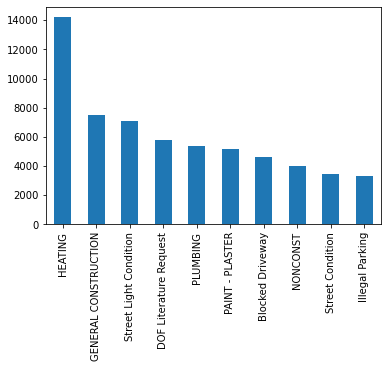

In [386]:
compHead.plot(kind = 'bar')

### 4. 거주지별 Complain 개수 출력

In [387]:
compBo = services.groupby(['Borough', 'Complaint Type'])[['Complaint Type']].count()
compBo

Complaint Type
Borough     Complaint Type                                   
BRONX       APPLIANCE                                     108
            Air Quality                                    40
            Animal Abuse                                  162
            Animal in a Park                               17
            Asbestos                                       17
...                                                       ...
Unspecified Taxi Compliment                                73
            Traffic Signal Condition                       10
            Transportation Provider Complaint               1
            Vacant Lot                                      3
            Water System                                    2

[638 rows x 1 columns]

### 5. 거주지와 Complain 크로스 테이블 출력

In [394]:
compBoCross = pd.crosstab(services['Borough'], services['Complaint Type'], margins=False)
compBoCross

Complaint Type,APPLIANCE,Adopt-A-Basket,Agency Issues,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,108,0,0,40,162,0,17,17,12,0,...,8,2,20,23,17,15,13,278,0,0
BROOKLYN,175,0,0,125,0,4,15,29,16,6,...,10,12,61,35,8,31,28,517,1,0
MANHATTAN,89,3,0,203,2,2,23,60,18,0,...,11,10,8,119,46,21,26,961,1,0
QUEENS,67,0,0,76,0,0,16,30,5,1,...,12,6,29,49,13,53,12,552,0,1
STATEN ISLAND,6,0,0,15,0,2,13,7,1,0,...,0,0,25,3,6,10,10,326,0,0
Unspecified,0,0,174,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,2,0,0


### 6. Complain 종류별 카운트 내용 kde 출력

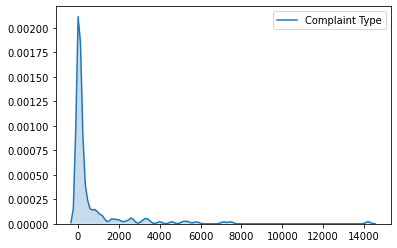

In [389]:
sns.kdeplot(compCnt, shade=True)

### 7. Noise Complain이 많은 지역 출력

In [401]:
compBoCross['Noise - Street/Sidewalk'].sort_values(ascending = False)

Borough
MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Noise - Street/Sidewalk, dtype: int64

### 8. Noise Complain이 전체에서 차지하는 비율 출력

In [430]:
Noise = services['Complaint Type'] == 'Noise - Street/Sidewalk'
compNoise = services[Noise]
Ratio = len(compNoise) / len(comp) * 100
Ratio

1.7358578901403632